In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\workspace\smart energy\usecase\Anomaly_energy_consumption\Anomaly_Machine_Learning_dataset\energy_consumption_data.csv")

In [4]:
df.head()

,timestamp,energy_consumption,building_id,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday
0,2020-01-01 00:00:00,5.8438,1.0,18.2083,20.0417,9.4000,50.2833,8.7933,159.6167,1,1,0,2,library,0,summer,1.0
1,2020-01-01 01:00:00,7.5312,1.0,17.2317,19.0067,9.0683,52.5000,8.1167,157.8667,1,1,1,2,library,0,summer,1.0
2,2020-01-01 02:00:00,7.5312,1.0,16.9167,18.9767,8.9700,52.2833,9.4600,152.4000,1,1,2,2,library,0,summer,1.0
3,2020-01-01 03:00:00,8.0625,1.0,15.7317,17.5467,8.5250,55.4167,7.5700,183.2000,1,1,3,2,library,0,summer,1.0
4,2020-01-01 04:00:00,7.6250,1.0,15.0667,16.4633,8.7233,60.1000,5.6700,190.9500,1,1,4,2,library,0,summer,1.0


In [5]:
# checking for null values in dataset
df.isnull().sum()

timestamp                 0
energy_consumption        0
building_id               0
apparent_temperature     99
air_temperature          99
dew_point_temperature    99
relative_humidity        99
wind_speed               99
wind_direction           99
month                     0
day                       0
hour                      0
weekday                   0
building_category         0
is_weekend                0
season                    0
is_holiday                0
dtype: int64

In [6]:
#checking the shape of dataframe which has 1 year hourly data and 19 column.
df.shape

(79056, 17)

In [7]:
# checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79056 entries, 0 to 79055
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              79056 non-null  object 
 1   energy_consumption     79056 non-null  float64
 2   building_id            79056 non-null  float64
 3   apparent_temperature   78957 non-null  float64
 4   air_temperature        78957 non-null  float64
 5   dew_point_temperature  78957 non-null  float64
 6   relative_humidity      78957 non-null  float64
 7   wind_speed             78957 non-null  float64
 8   wind_direction         78957 non-null  float64
 9   month                  79056 non-null  int64  
 10  day                    79056 non-null  int64  
 11  hour                   79056 non-null  int64  
 12  weekday                79056 non-null  int64  
 13  building_category      79056 non-null  object 
 14  is_weekend             79056 non-null  int64  
 15  se

In [8]:
# checking the datatype of each columns
df.describe()

,energy_consumption,building_id,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,is_weekend,is_holiday
count,79056.000000,79056.000000,78957.000000,78957.000000,78957.000000,78957.000000,78957.000000,78957.000000,79056.000000,79056.000000,79056.00000,79056.000000,79056.000000,79056.000000
mean,15.089880,5.000000,13.792473,15.587136,9.011858,71.434345,8.869911,173.646959,6.513661,15.756831,11.50000,2.997268,0.284153,0.002732
std,20.483902,2.582005,7.942480,7.874472,4.321807,24.758121,7.207867,87.842718,3.451256,8.811585,6.92223,1.995224,0.451013,0.052200
min,0.000000,1.000000,-4.081700,-1.378300,-9.681700,3.616700,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,2.794000,3.000000,7.671700,9.616700,6.085000,52.950000,2.750000,106.200000,4.000000,8.000000,5.75000,1.000000,0.000000,0.000000
50%,7.360000,5.000000,13.186700,14.868300,8.723300,75.566700,7.783300,151.216700,7.000000,16.000000,11.50000,3.000000,0.000000,0.000000
75%,16.323500,7.000000,19.400000,20.810000,11.775000,94.866700,13.360000,260.816700,10.000000,23.000000,17.25000,5.000000,1.000000,0.000000
max,144.614200,9.000000,39.941700,45.208300,22.368300,100.000000,42.561700,358.000000,12.000000,31.000000,23.00000,6.000000,1.000000,1.000000


In [9]:
df.describe(include="O")

,timestamp,building_category,season
count,79056,79056,79056
unique,8784,5,4
top,2020-01-01 00:00:00,teaching,autumn
freq,9,35136,19872


# Check for outliers

### Energy_Consumption

<Axes: xlabel='energy_consumption', ylabel='Count'>

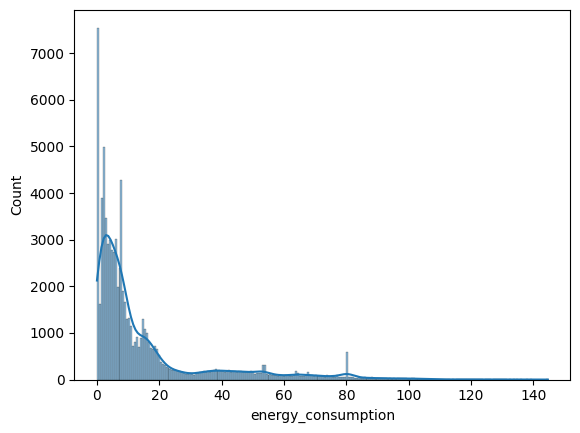

In [10]:
sns.histplot(df["energy_consumption"],kde=True)

In [11]:
Q1 = df["energy_consumption"].quantile(0.25)
Q3 = df["energy_consumption"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-17.500249999999998, 36.61775)

<Axes: ylabel='energy_consumption'>

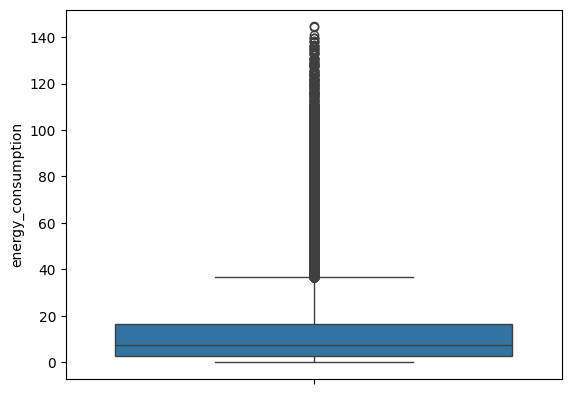

In [12]:
sns.boxplot(df["energy_consumption"])

In [13]:
## we donot want to change any values because the energy consumption of that level is acceptable.

## Air Temperature

<Axes: xlabel='air_temperature', ylabel='Count'>

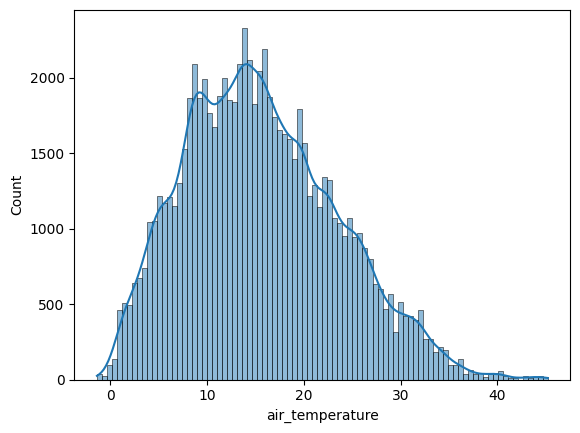

In [14]:
sns.histplot(df["air_temperature"],kde=True)

In [15]:
## histogram shows it is normaly distributes so,we use mean and standard deviation for outliers
mean=np.mean(df["air_temperature"])
std=np.std(df["air_temperature"])
lower_bound=mean-(3*std)
upper_bound=mean+(3*std)
lower_bound,upper_bound

(-8.036129361003594, 39.210402084131374)

<Axes: ylabel='air_temperature'>

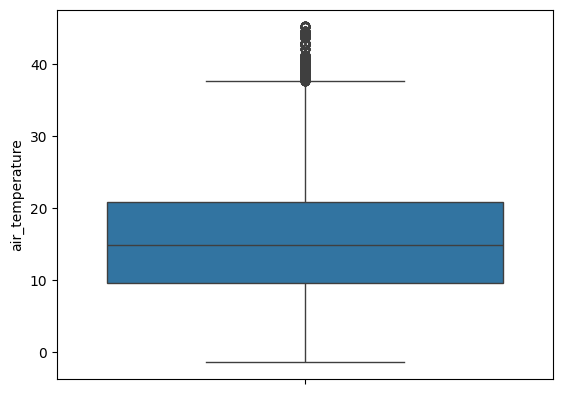

In [16]:
sns.boxplot(df["air_temperature"])

In [17]:
## we donot want to change any values because air temperature of that level is acceptable.

### Apparent_temperature

<Axes: xlabel='apparent_temperature', ylabel='Count'>

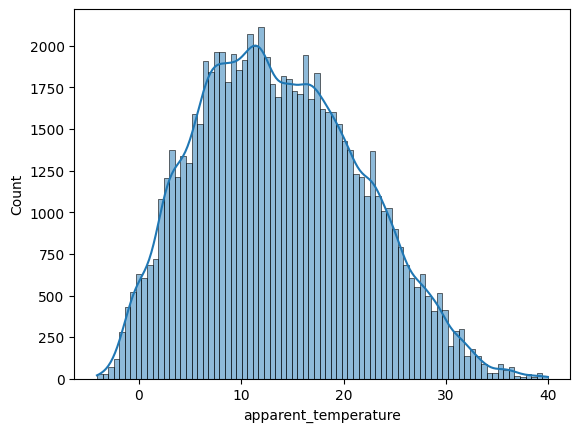

In [18]:
sns.histplot(df["apparent_temperature"],kde=True)

In [19]:
## histogram shows it is normaly distributes so,we use mean and standard deviation for outliers
mean=np.mean(df["apparent_temperature"])
std=np.std(df["apparent_temperature"])
lower_bound=mean-(3*std)
upper_bound=mean+(3*std)
lower_bound,upper_bound

(-10.034817386162343, 37.619762536054054)

<Axes: ylabel='apparent_temperature'>

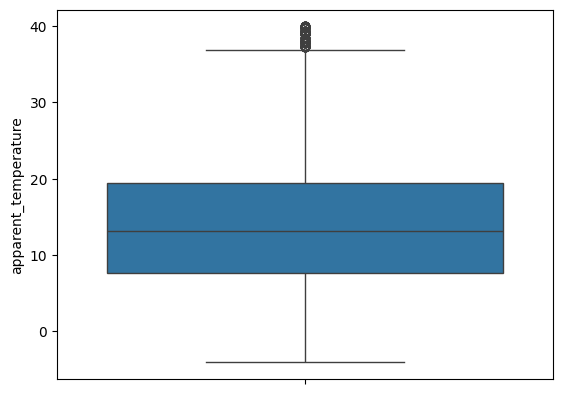

In [20]:
sns.boxplot(df["apparent_temperature"])

In [21]:
## we donot want to change any values because the apparent temperature of that level is acceptable.

### dew point Temperature

<Axes: xlabel='dew_point_temperature', ylabel='Count'>

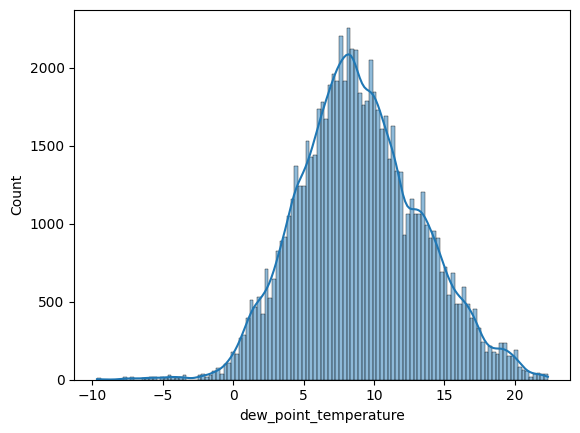

In [22]:
sns.histplot(df["dew_point_temperature"],kde=True)

In [23]:
## histogram shows it is normaly distributes so,we use mean and standard deviation for outliers
mean=np.mean(df["dew_point_temperature"])
std=np.std(df["dew_point_temperature"])
lower_bound=mean-(3*std)
upper_bound=mean+(3*std)
lower_bound,upper_bound

(-3.953482016831204, 21.9771981914579)

<Axes: ylabel='dew_point_temperature'>

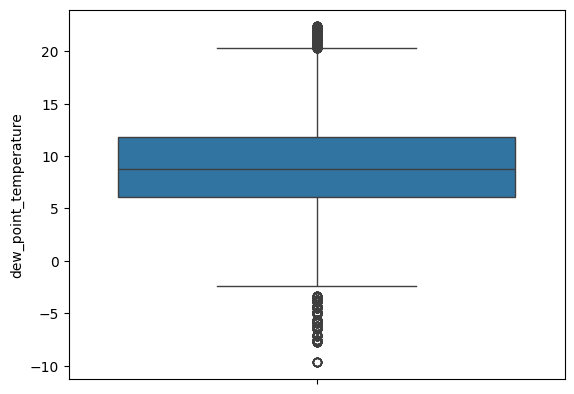

In [24]:
sns.boxplot(df["dew_point_temperature"])

In [25]:
## we donot want to change any values because the dew point temperature of that level is acceptable

### Relative_humidity

<Axes: xlabel='relative_humidity', ylabel='Count'>

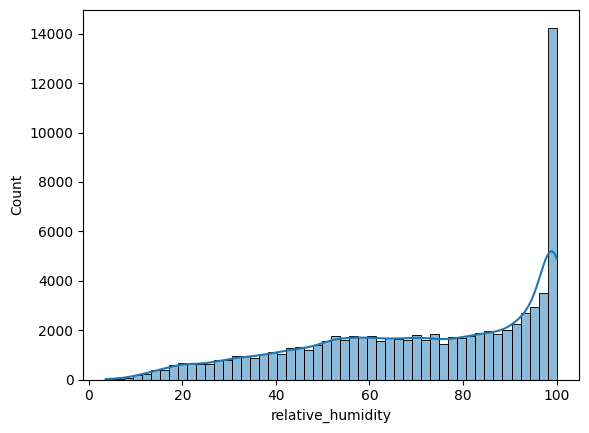

In [26]:
sns.histplot(df["relative_humidity"],kde=True)

In [27]:
## histogram shows it is not normaly distributed,so we use IQR for outliers
Q1 = df["relative_humidity"].quantile(0.25)
Q3 = df["relative_humidity"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-9.925049999999985, 157.74174999999997)

<Axes: ylabel='relative_humidity'>

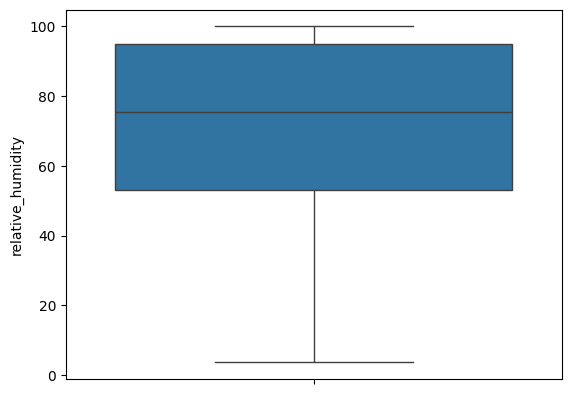

In [28]:
sns.boxplot(df["relative_humidity"])

In [29]:
## we donot want to change any values because the relative humidity of that level is acceptable

### wind speed

<Axes: xlabel='wind_speed', ylabel='Count'>

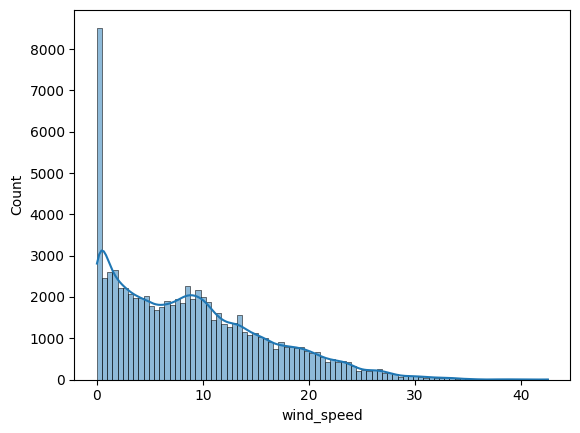

In [30]:
sns.histplot(df["wind_speed"],kde=True)

In [31]:
## histogram shows it is not normaly distributed so,we use IQR for outliers
Q1 = df["wind_speed"].quantile(0.25)
Q3 = df["wind_speed"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-13.165, 29.275)

<Axes: ylabel='wind_speed'>

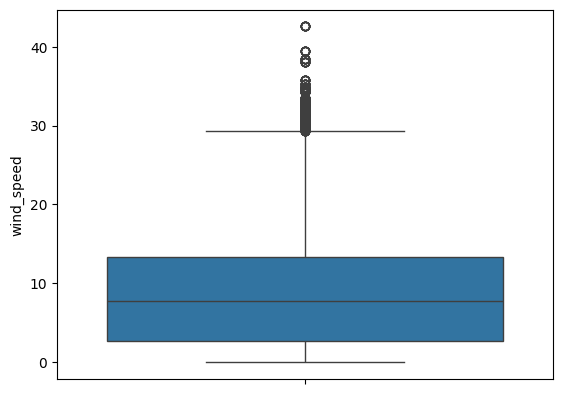

In [32]:
sns.boxplot(df["wind_speed"])

In [33]:
## we donot want to change any values because the wind speed of that level is acceptable

### wind direction

<Axes: xlabel='wind_direction', ylabel='Count'>

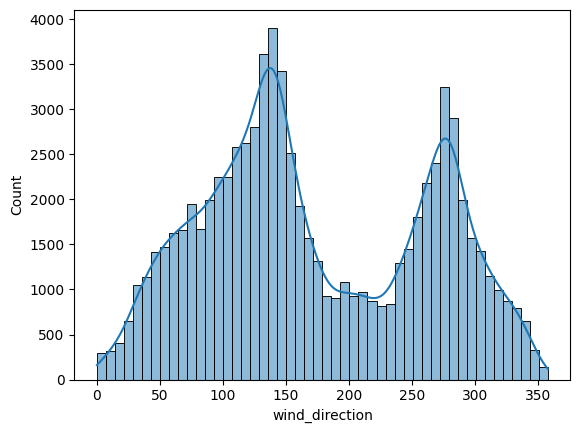

In [34]:
sns.histplot(df["wind_direction"],kde=True)

In [35]:
## histogram shows it is normaly distributes so,we use mean and standard deviation for outliers
mean=np.mean(df["wind_direction"])
std=np.std(df["wind_direction"])
lower_bound=mean-(3*std)
upper_bound=mean+(3*std)

In [36]:
lower_bound,upper_bound

(-89.87952472904146, 437.17344304660674)

<Axes: ylabel='wind_direction'>

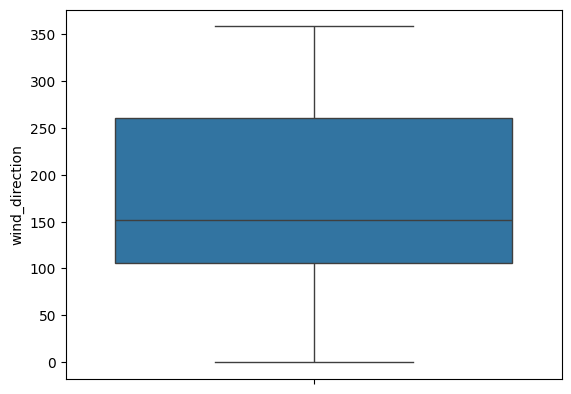

In [37]:
sns.boxplot(df["wind_direction"])

In [38]:
## we donot want to change any values because the wind direction of that level is acceptable

## Converting a Categorical variable to numerical variable

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [40]:
df.describe(include="O")

,timestamp,building_category,season
count,79056,79056,79056
unique,8784,5,4
top,2020-01-01 00:00:00,teaching,autumn
freq,9,35136,19872


In [41]:
df["building_category"]=le.fit_transform(df["building_category"])
df["season"]=le.fit_transform(df["season"])

### checking for null values

In [42]:
df.isnull().sum()

timestamp                 0
energy_consumption        0
building_id               0
apparent_temperature     99
air_temperature          99
dew_point_temperature    99
relative_humidity        99
wind_speed               99
wind_direction           99
month                     0
day                       0
hour                      0
weekday                   0
building_category         0
is_weekend                0
season                    0
is_holiday                0
dtype: int64

In [43]:
df["air_temperature"]=df["air_temperature"].fillna(df["air_temperature"].mean())
df["apparent_temperature"]=df["apparent_temperature"].fillna(df["apparent_temperature"].mean())
df["wind_speed"]=df["wind_speed"].fillna(df["wind_speed"].mean())
df["dew_point_temperature"]=df["dew_point_temperature"].fillna(df["dew_point_temperature"].mean())
df["relative_humidity"]=df["relative_humidity"].fillna(df["relative_humidity"].mean())
df["wind_direction"]=df["wind_direction"].fillna(df["wind_direction"].mean())

In [44]:
df.isnull().sum()

timestamp                0
energy_consumption       0
building_id              0
apparent_temperature     0
air_temperature          0
dew_point_temperature    0
relative_humidity        0
wind_speed               0
wind_direction           0
month                    0
day                      0
hour                     0
weekday                  0
building_category        0
is_weekend               0
season                   0
is_holiday               0
dtype: int64

# feature_selection

<Axes: >

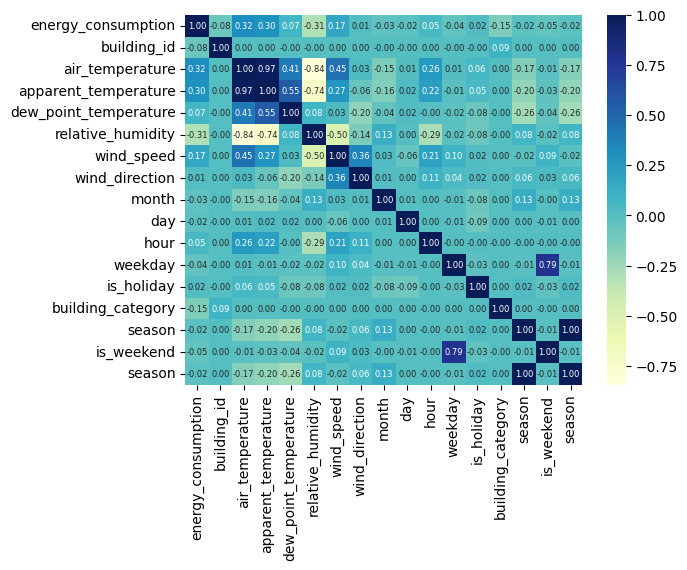

In [45]:
sns.heatmap(df[['energy_consumption', 'building_id', 'air_temperature','apparent_temperature', 'dew_point_temperature', 
   'relative_humidity','wind_speed', 'wind_direction', 'month', 'day', 'hour','weekday', 'is_holiday',
   'building_category','season','is_weekend','season']].corr(),annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size":6 })

In [46]:
df=df.drop(["air_temperature","timestamp"],axis=1)

In [47]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [48]:
from sklearn.ensemble import IsolationForest

In [49]:
clf = IsolationForest(contamination=0.02)  
clf.fit(train_data)

IsolationForest(contamination=0.02)

In [50]:
y_pred = clf.predict(test_data)

In [51]:
y_pred_mapped = [1 if x == -1 else 0 for x in y_pred]


In [52]:
test_data['Is_Outlier'] = y_pred_mapped

C:\Users\grthi\AppData\Local\Temp\ipykernel_9320\470552987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Is_Outlier'] = y_pred_mapped


In [53]:
test_data.head()

,energy_consumption,building_id,apparent_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday,Is_Outlier
63244,2.438,8.0,10.9050,8.7900,63.2500,23.535,129.4167,3,14,4,5,3,1,0,0.0,0
63245,2.515,8.0,9.8400,6.7450,59.8333,19.835,120.2833,3,14,5,5,3,1,0,0.0,0
63246,7.128,8.0,8.8200,4.8600,56.6500,16.970,131.4167,3,14,6,5,3,1,0,0.0,0
63247,0.824,8.0,8.1167,2.9000,51.3667,15.660,147.2167,3,14,7,5,3,1,0,0.0,0
63248,1.341,8.0,7.4667,1.0383,43.9000,19.220,154.1500,3,14,8,5,3,1,0,0.0,0


## future_prediction

In [54]:
future_prediction=pd.read_csv(r"C:\workspace\smart energy\usecase\Anomaly_energy_consumption\Anomaly_Machine_Learning_dataset\anomaly_testing_input.csv")

In [55]:
future_prediction

,building_id,apparent_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday,energy_consumption_prediction,year,timestamp
0,1.0,22.6933,14.2583,57.1167,9.6333,130.6167,1,1,0,4,0,0,0,1.0,11.848167,2021,2021-01-01 00:00:00
1,1.0,21.5667,13.8483,56.5333,13.2550,59.6000,1,1,1,4,0,0,0,1.0,8.902531,2021,2021-01-01 01:00:00
2,1.0,21.2267,15.0000,63.3333,13.7200,36.4167,1,1,2,4,0,0,0,1.0,8.328656,2021,2021-01-01 02:00:00
3,1.0,22.1600,15.0117,65.2333,6.5267,52.1833,1,1,3,4,0,0,0,1.0,8.038478,2021,2021-01-01 03:00:00
4,1.0,22.0550,15.2733,68.7667,4.7300,40.5000,1,1,4,4,0,0,0,1.0,10.430032,2021,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,9.0,24.0033,14.2233,48.9000,16.0550,97.4500,1,1,19,4,3,0,0,1.0,8.605880,2021,2021-01-01 19:00:00
211,9.0,21.6267,14.6333,56.8667,18.1450,33.4500,1,1,20,4,3,0,0,1.0,7.745340,2021,2021-01-01 20:00:00
212,9.0,21.5750,15.0683,63.6667,12.1300,35.8500,1,1,21,4,3,0,0,1.0,8.171750,2021,2021-01-01 21:00:00
213,9.0,20.8200,14.6500,64.7167,11.6500,36.6667,1,1,22,4,3,0,0,1.0,8.235480,2021,2021-01-01 22:00:00


In [56]:
future_prediction=future_prediction.rename({"energy_consumption_prediction":"energy_consumption"},axis=1)
future_prediction=future_prediction.drop(["year","timestamp"],axis=1)

In [57]:
future_prediction=future_prediction[['energy_consumption', 'building_id', 'apparent_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction', 'month', 'day', 'hour', 'weekday',
       'building_category', 'is_weekend', 'season', 'is_holiday']]

In [58]:
y_pred = clf.predict(future_prediction)

In [59]:
y_pred_mapped = [1 if x == -1 else 0 for x in y_pred]
future_prediction['Is_Outlier'] = y_pred_mapped

In [60]:
future_prediction.head()

,energy_consumption,building_id,apparent_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday,Is_Outlier
0,11.848167,1.0,22.6933,14.2583,57.1167,9.6333,130.6167,1,1,0,4,0,0,0,1.0,0
1,8.902531,1.0,21.5667,13.8483,56.5333,13.2550,59.6000,1,1,1,4,0,0,0,1.0,0
2,8.328656,1.0,21.2267,15.0000,63.3333,13.7200,36.4167,1,1,2,4,0,0,0,1.0,0
3,8.038478,1.0,22.1600,15.0117,65.2333,6.5267,52.1833,1,1,3,4,0,0,0,1.0,0
4,10.430032,1.0,22.0550,15.2733,68.7667,4.7300,40.5000,1,1,4,4,0,0,0,1.0,0


In [61]:
future_prediction["year"]=2021
future_prediction["timestamp"]=pd.to_datetime(future_prediction[["year","month","day","hour"]])

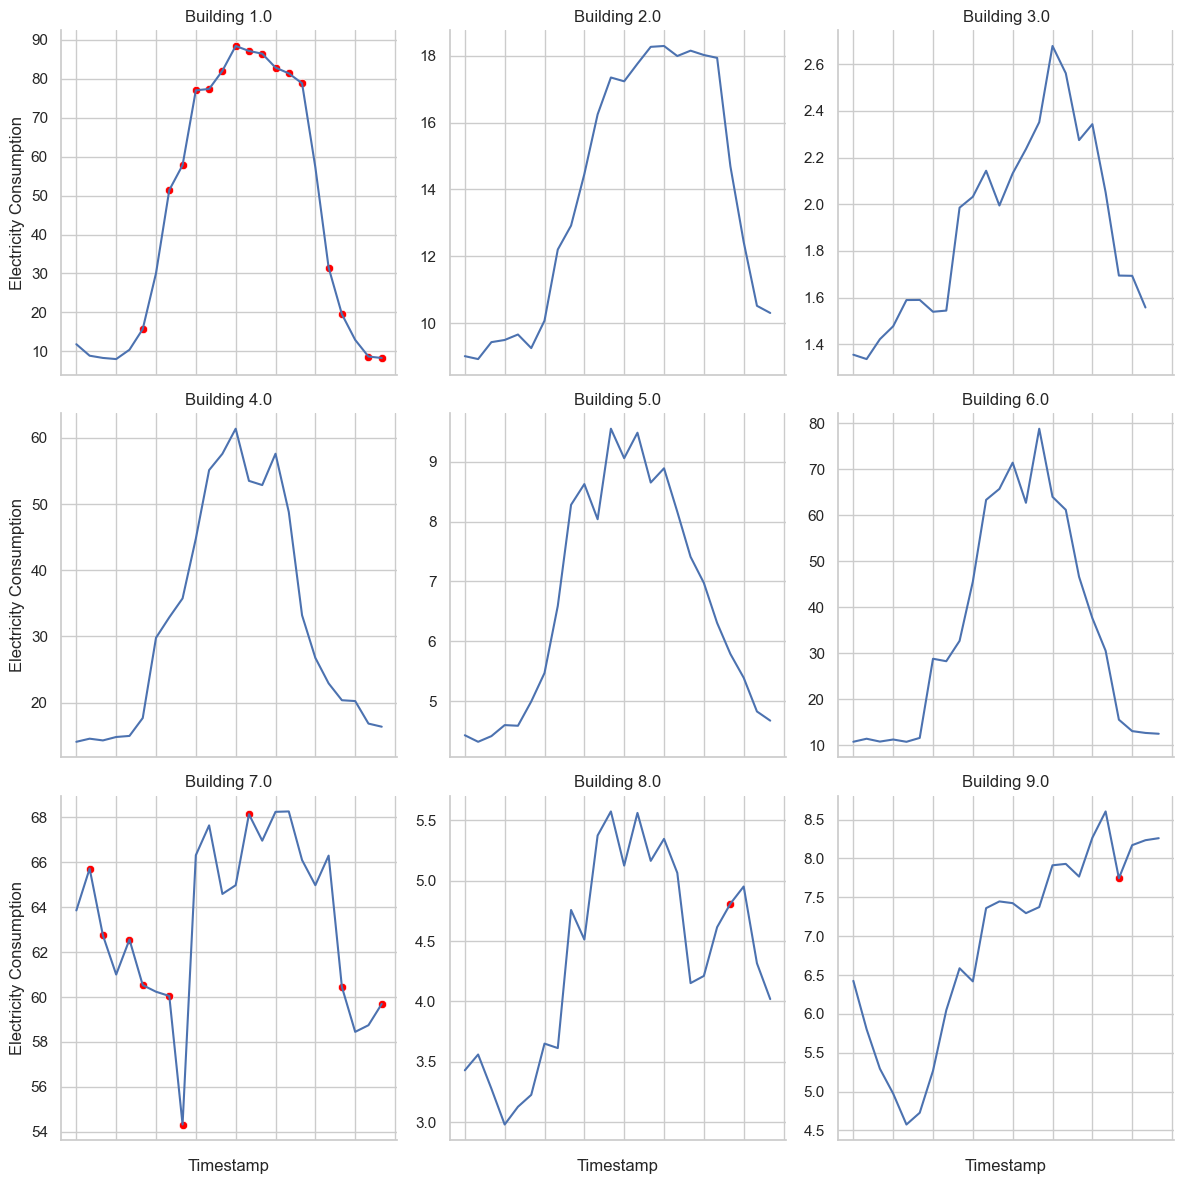

In [62]:
sns.set(style="whitegrid")
g = sns.FacetGrid(future_prediction, col="building_id", col_wrap=3, height=4,sharey=False)

g.map(sns.lineplot, "timestamp", "energy_consumption")
g.map_dataframe(lambda data, color: sns.scatterplot(data=data[data["Is_Outlier"] == 1], x="timestamp", y="energy_consumption", color="red", marker="o"))

g.set_titles("Building {col_name}")
g.set_axis_labels("Timestamp", "Electricity Consumption")
g.set_xticklabels(rotation=90)
    

plt.tight_layout()
plt.show()

In [65]:
from joblib import dump
dump(clf,r"C:\workspace\smart energy\saved project\anomaly_energy_consumption_predict.joblib")

['C:\\workspace\\smart energy\\saved project\\anomaly_energy_consumption_predict.joblib']

In [68]:
future_prediction.drop(['Is_Outlier','year','timestamp'],axis=1,inplace=True)

In [69]:
future_prediction.to_json(orient="records")

'[{"energy_consumption":11.848167,"building_id":1.0,"apparent_temperature":22.6933,"dew_point_temperature":14.2583,"relative_humidity":57.1167,"wind_speed":9.6333,"wind_direction":130.6167,"month":1,"day":1,"hour":0,"weekday":4,"building_category":0,"is_weekend":0,"season":0,"is_holiday":1.0},{"energy_consumption":8.902531,"building_id":1.0,"apparent_temperature":21.5667,"dew_point_temperature":13.8483,"relative_humidity":56.5333,"wind_speed":13.255,"wind_direction":59.6,"month":1,"day":1,"hour":1,"weekday":4,"building_category":0,"is_weekend":0,"season":0,"is_holiday":1.0},{"energy_consumption":8.328656,"building_id":1.0,"apparent_temperature":21.2267,"dew_point_temperature":15.0,"relative_humidity":63.3333,"wind_speed":13.72,"wind_direction":36.4167,"month":1,"day":1,"hour":2,"weekday":4,"building_category":0,"is_weekend":0,"season":0,"is_holiday":1.0},{"energy_consumption":8.038478,"building_id":1.0,"apparent_temperature":22.16,"dew_point_temperature":15.0117,"relative_humidity":65.